In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sc
import os

path=r"C:\Users\akash\OneDrive\Desktop\data science\data files\Visadataset.csv"


visa_df=pd.read_csv(path)
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns

**box plot**
  
- it is used to identify the outliers

- outlier is an observation having huge positive value or huge negative value

- Q1=25p , Q2=50p, Q3=75p

- IQR=Inter quartile range = Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

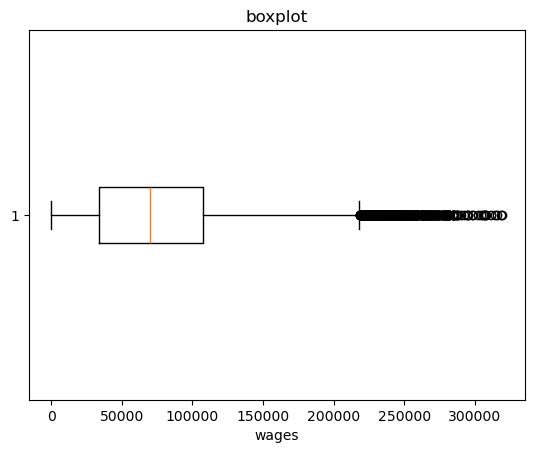

In [3]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

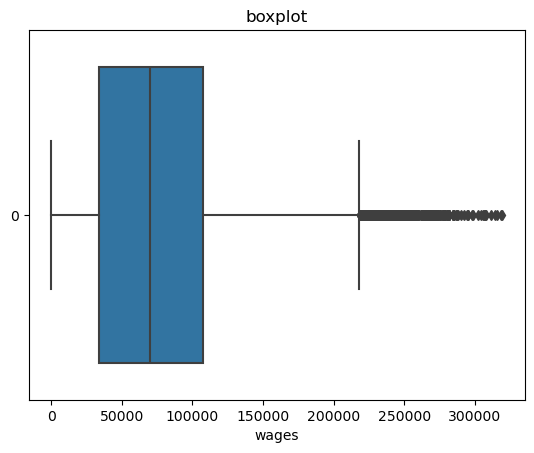

In [4]:

sc.boxplot(wage_data,orient='h')
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

**plot the histogram plot and box plot side by side**

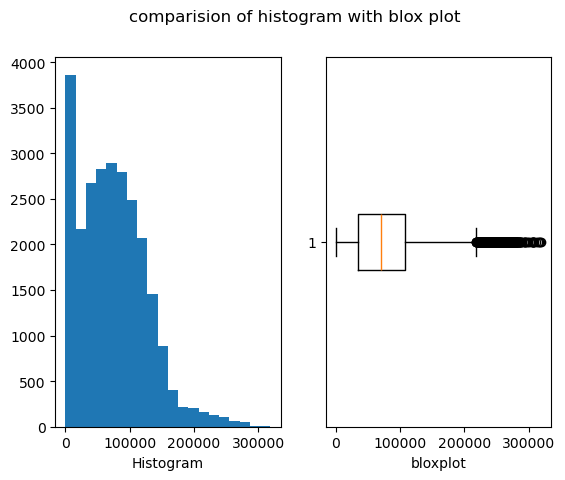

In [6]:
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('bloxplot')
plt.show()

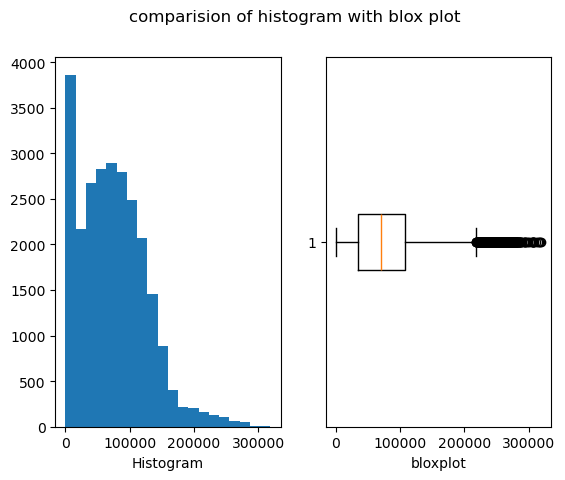

In [7]:
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('bloxplot')
plt.show()

**finding the outliers**

- we already know that outliers availabe less than Q1-1.5*IQR AND Q3+1.5*IQR

- step-1:

    - calculate Q1=25P

    - calculate Q2=50p

    - calculate Q3=75p

- step-2:

    - calculate IQR=Q3-Q1

- step-3:

    - calculate LB=Q1-1.5*IQR

    - calculate UB=Q3+1.5*IQR

- step-4:

    - con1= wage_data<LB

    - CON2= wage_data>ub

    - con3= con1 or con2 (use bitwise operatoe)
- step-5:

    - data[con3]

In [9]:
#step-1

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#step-2

IQR=Q3-Q1

#step-3

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

#step-4

con1= wage_data < LB
con2= wage_data > UB
con3= con1 | con2
#bitwise operator used for compare
#bitwise data===0 and 1 == True false
#step-5

outlier_data=wage_data[con3]
outlier_data


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [10]:
outlier_df=pd.DataFrame(outlier_data)
outlier_df

,prevailing_wage
14,220081.73
34,225569.73
130,247393.01
216,269321.68
221,219529.62
...,...
25191,280482.51
25195,234308.77
25468,272715.74
25469,273772.47


In [11]:
#step-1

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#step-2

IQR=Q3-Q1

#step-3

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

#step-4

con1= wage_data > LB
con2= wage_data < UB
con3= con1 & con2
#bitwise operator used for compare
#bitwise data===0 and 1 == True false
#step-5

non_outlier_data=wage_data[con3]
non_outlier_df=pd.DataFrame(non_outlier_data)
non_outlier_df


,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25474,51104.7800
25475,77092.5700
25477,146298.8500
25478,86154.7700


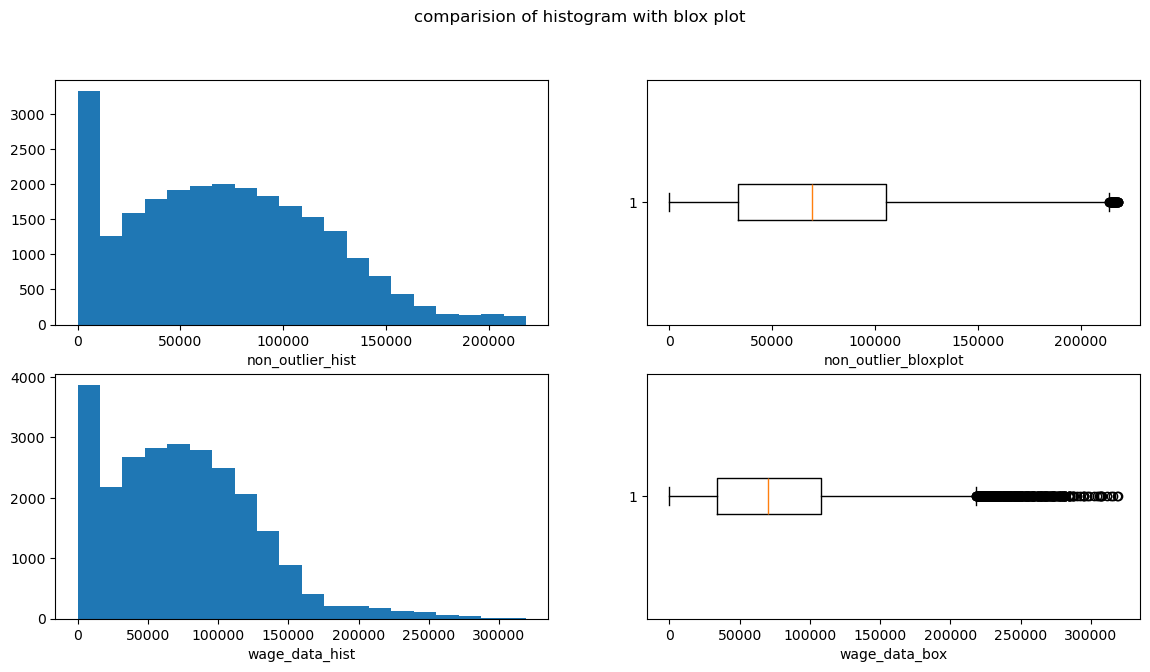

In [12]:
plt.figure(figsize=(14,7))
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(2,2,1).hist(non_outlier_data,bins=20)
plt.xlabel('non_outlier_hist')
plt.subplot(2,2,2).boxplot(non_outlier_data,vert=False)
plt.xlabel('non_outlier_bloxplot')
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('wage_data_hist')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('wage_data_box')
plt.show()

**10.8.24**

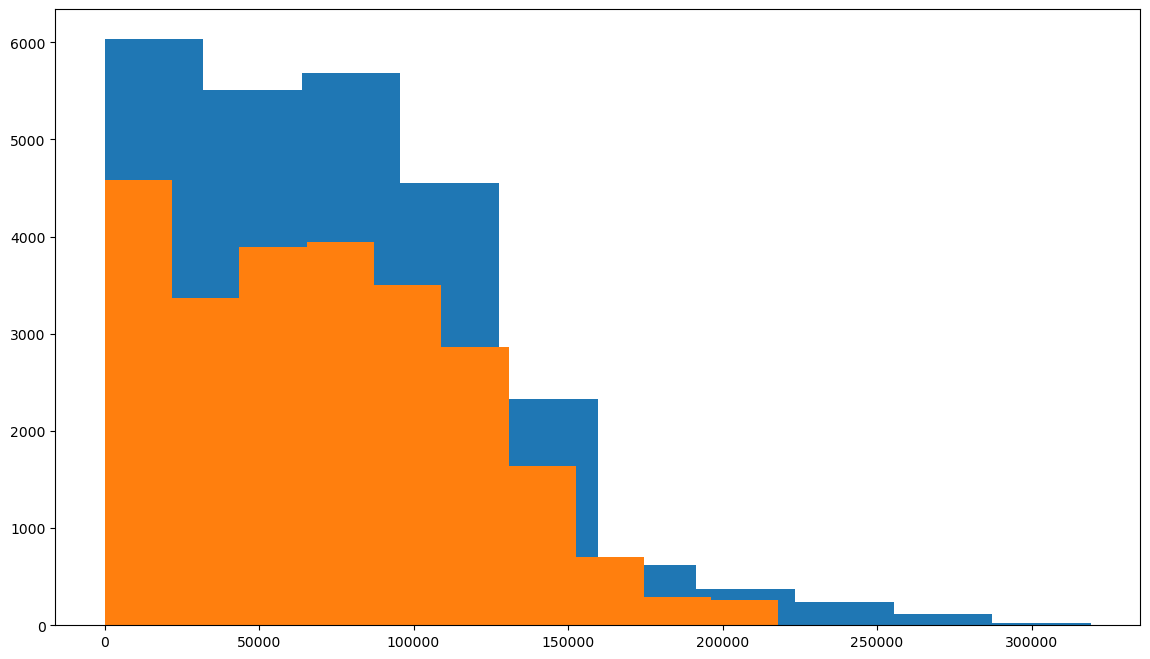

In [14]:
wage_data_non_outliers=non_outlier_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']

###################################################################

plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal outliers**

- 1.we can drop the outliers

    - droping outliers is an easy task , but not recomended
 
    - if u drop the outliers we are droping the rows
 
    - which means we are droping the other column value also
 
    - may be some important information we might loose from other column values
 
    - but in industry if the outliers percentage less than 2% of the data, we  can drop
 
    - the number of outliers in wage is 427
 
    - the number of total observartion  are 25480
 
    - the percentage is 1.67 which is less than 2%
 
- 2. fill with median value
 
    - we already know that outliers does not affect by median
 
    - so it is the best practice to fill the outliers with median
 
- 3. capping or florring

  - instead of fill with median
 
  - we can fill with certain values
 
  - the outliers which are less than LB fill with LB value
 
  - the outliers which are greater than UB fill  with UB value
 
- **Isolation Forest**

    - Is ML model used to find the outliers and anamolies

**fill with median value**

**np.where**

- in numpy we have method called where

- it takes three arguments

    - 1. Condition

    - 2. value if condition is true

    - 3. value if condition is false

- it is applicable  for only Binary means if and else


In [18]:
# list1=[]
# for value in wage_data:
#     if value<LB or value>UB:
#         median=wage_data.median()
#         list1.append(median)
#     else:
#         list1.append(value)

In [19]:
dict1={'sub':['ds','de','cs'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,ds,100
1,de,200
2,cs,300


In [20]:
#qn: i want to replace marks with 1, which are greater than 100

for marks in dict1:
    if mark<100:
        marks=

SyntaxError: invalid syntax (1350134563.py, line 5)

In [21]:
#qn: i want to replace marks with 1, which are greater than 100
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [23]:
dict1={'sub':['ds','de','cs'],
   'marks':[100,200,300]}
df1=pd.DataFrame(dict1)
df1

,sub,marks
0,ds,100
1,de,200
2,cs,300


In [25]:
#np.where(<condition>,<True>,<False>)
l=np.where(df1['marks']>100,1,df1['marks'])
df1['marks']=l
df1

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [27]:
##implement for the out liers
wage_data=visa_df['prevailing_wage']
con1= wage_data<LB
con2= wage_data>UB
con3= con1|con2
wage_med=wage_data.median()
l= np.where(con3, wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [29]:
visa_df['prevailing_wage_updated']=l

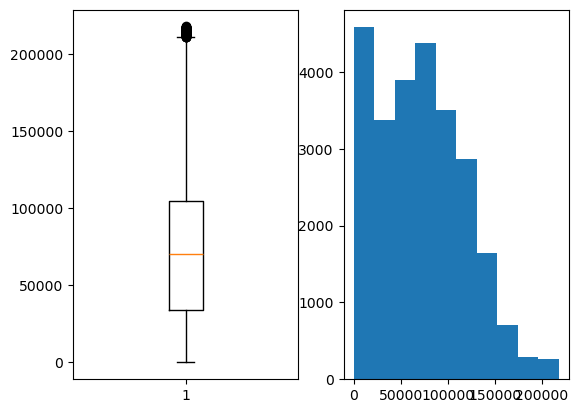

In [31]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_updated'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_updated'])
plt.show()